,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


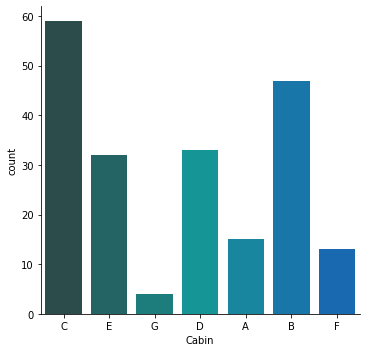

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv(r'C:\Users\Nikhil\Downloads\train.csv')
titanic_df = pd.DataFrame(data)
def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex

titanic_df['Person'] =titanic_df[['Age','Sex']].apply(male_female_child,axis = 1)
titanic_df.head(10)
titanic_df['Age'].mean()
deck = titanic_df['Cabin'].dropna()
deck.head()
levels = []
for level in deck:
    levels.append(level[0])
cabin_df = pd.DataFrame(levels,columns = ['Cabin'])
cabin_df = cabin_df[cabin_df != 'T']
sns.factorplot('Cabin',data = cabin_df,palette='winter_d',kind ='count',row_order = None)

    

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

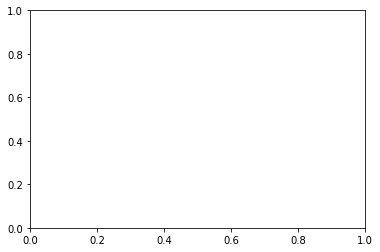